In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)


In [5]:
pima.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [7]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable


In [9]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


                  precision    recall  f1-score   support

without diabetes       0.77      0.76      0.77       102
   with diabetes       0.55      0.56      0.55        52

        accuracy                           0.69       154
       macro avg       0.66      0.66      0.66       154
    weighted avg       0.70      0.69      0.70       154



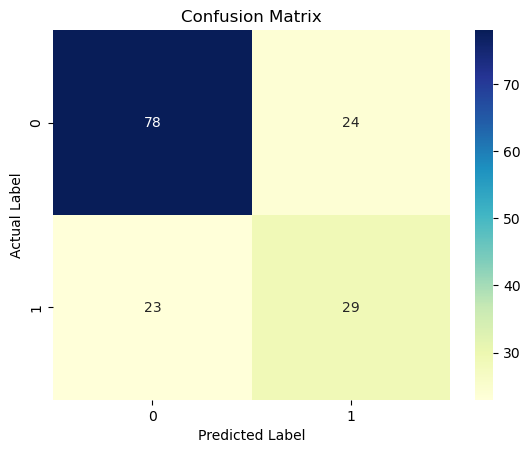

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("diabetes.csv")

# Check for non-numeric values
df = df.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric

# Define features (X) and target (y)
X = df.drop(columns=['Outcome'])  # 'Outcome' is the target column
y = df['Outcome']

# Handle missing values (if any)
X = X.dropna()
y = y[X.index]  # Ensure target aligns with features

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Decision Tree model
clf = DecisionTreeClassifier(random_state=16)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Classification Report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


In [15]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6948051948051948


In [21]:
!pip install pydotplus


     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/278.7 kB ? eta -:--:--
     ----- ------------------------------- 41.0/278.7 kB 495.5 kB/s eta 0:00:01
     ---------- -------------------------- 81.9/278.7 kB 657.6 kB/s eta 0:00:01
     -------------- --------------------- 112.6/278.7 kB 595.3 kB/s eta 0:00:01
     --------------------- -------------- 163.8/278.7 kB 756.6 kB/s eta 0:00:01
     ----------------------------- ------ 225.3/278.7 kB 808.4 kB/s eta 0:00:01
     -----------------------------------  276.5/278.7 kB 896.4 kB/s eta 0:00:01
     ------------------------------------ 278.7/278.7 kB 818.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=fd9e208e9fdc1c1429608db959257176868bb6583251acdbf85606e5997ea1e9
  Stored in directory: c:\users\rut

In [29]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
import graphviz
import pydotplus
from six import StringIO  
from IPython.display import Image

# Sample dataset
data = {
    'Age': [25, 35, 45, 20, 35, 52, 23, 40, 60, 48],
    'Salary': [50000, 60000, 80000, 20000, 120000, 180000, 95000, 72000, 250000, 110000],
    'Buys_Laptop': [0, 0, 1, 0, 1, 1, 0, 1, 1, 1]  # Target variable (0 = No, 1 = Yes)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features and target
X = df[['Age', 'Salary']]
y = df['Buys_Laptop']

# Train Decision Tree model
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)  # Change criterion to 'gini' if needed
clf.fit(X, y)

# Generate visualization data
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=['Age', 'Salary'], class_names=['No', 'Yes'])

# Convert to Graphviz format
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save as image
graph.write_png('decision_tree.png')

# Display image
Image(graph.create_png())




ModuleNotFoundError: No module named 'graphviz'

In [31]:
pip install pandas numpy graphviz pydotplus scikit-learn



SyntaxError: invalid syntax (861644070.py, line 1)

In [33]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
import graphviz
import pydotplus
from six import StringIO  
from IPython.display import Image

# Sample dataset
data = {
    'Age': [25, 35, 45, 20, 35, 52, 23, 40, 60, 48],
    'Salary': [50000, 60000, 80000, 20000, 120000, 180000, 95000, 72000, 250000, 110000],
    'Buys_Laptop': [0, 0, 1, 0, 1, 1, 0, 1, 1, 1]  # Target variable (0 = No, 1 = Yes)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features and target
X = df[['Age', 'Salary']]
y = df['Buys_Laptop']

# Train Decision Tree model
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)  # Change criterion to 'gini' if needed
clf.fit(X, y)

# Generate visualization data
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=['Age', 'Salary'], class_names=['No', 'Yes'])

# Convert to Graphviz format
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save as image
graph.write_png('decision_tree.png')

# Display image
Image(graph.create_png())




ModuleNotFoundError: No module named 'graphviz'

In [35]:
!pip install graphviz pydotplus


  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)


In [1]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
import graphviz
import pydotplus
from six import StringIO  
from IPython.display import Image

# Sample dataset
data = {
    'Age': [25, 35, 45, 20, 35, 52, 23, 40, 60, 48],
    'Salary': [50000, 60000, 80000, 20000, 120000, 180000, 95000, 72000, 250000, 110000],
    'Buys_Laptop': [0, 0, 1, 0, 1, 1, 0, 1, 1, 1]  # Target variable (0 = No, 1 = Yes)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features and target
X = df[['Age', 'Salary']]
y = df['Buys_Laptop']

# Train Decision Tree model
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)  # Change criterion to 'gini' if needed
clf.fit(X, y)

# Generate visualization data
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=['Age', 'Salary'], class_names=['No', 'Yes'])

# Convert to Graphviz format
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save as image
graph.write_png('decision_tree.png')

# Display image
Image(graph.create_png())




InvocationException: GraphViz's executables not found

In [3]:
import graphviz
print(graphviz.__version__)


0.20.3


In [5]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
import graphviz
import pydotplus
from six import StringIO  
from IPython.display import Image

# Sample dataset
data = {
    'Age': [25, 35, 45, 20, 35, 52, 23, 40, 60, 48],
    'Salary': [50000, 60000, 80000, 20000, 120000, 180000, 95000, 72000, 250000, 110000],
    'Buys_Laptop': [0, 0, 1, 0, 1, 1, 0, 1, 1, 1]  # Target variable (0 = No, 1 = Yes)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features and target
X = df[['Age', 'Salary']]
y = df['Buys_Laptop']

# Train Decision Tree model
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)  # Change criterion to 'gini' if needed
clf.fit(X, y)

# Generate visualization data
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=['Age', 'Salary'], class_names=['No', 'Yes'])

# Convert to Graphviz format
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save as image
graph.write_png('decision_tree.png')

# Display image
Image(graph.create_png())




InvocationException: GraphViz's executables not found

In [7]:
import graphviz
print(graphviz.__version__)
print(graphviz.backend.EXECUTABLES)


0.20.3


AttributeError: module 'graphviz.backend' has no attribute 'EXECUTABLES'

In [9]:
import shutil
print(shutil.which("dot"))  # Should return the full path to dot.exe



None


In [11]:
import shutil
print(shutil.which("dot"))  # Should return the full path to dot.exe


None


In [13]:
from graphviz import backend

print(backend.find_graphviz())  # Checks if GraphViz executables are found



AttributeError: module 'graphviz.backend' has no attribute 'find_graphviz'

In [15]:
import shutil
print(shutil.which("dot"))


None


In [17]:
import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"


In [19]:
import shutil
print(shutil.which("dot"))


C:\Program Files\Graphviz\bin\dot.EXE


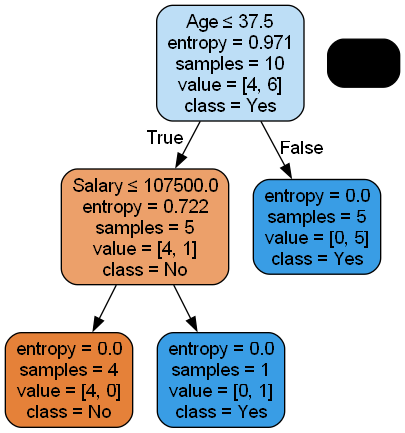

In [21]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
import graphviz
import pydotplus
from six import StringIO  
from IPython.display import Image

# Sample dataset
data = {
    'Age': [25, 35, 45, 20, 35, 52, 23, 40, 60, 48],
    'Salary': [50000, 60000, 80000, 20000, 120000, 180000, 95000, 72000, 250000, 110000],
    'Buys_Laptop': [0, 0, 1, 0, 1, 1, 0, 1, 1, 1]  # Target variable (0 = No, 1 = Yes)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features and target
X = df[['Age', 'Salary']]
y = df['Buys_Laptop']

# Train Decision Tree model
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)  # Change criterion to 'gini' if needed
clf.fit(X, y)

# Generate visualization data
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=['Age', 'Salary'], class_names=['No', 'Yes'])

# Convert to Graphviz format
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save as image
graph.write_png('decision_tree.png')

# Display image
Image(graph.create_png())


